# Stage 1 : EDA, Insights & Visualizations

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load DataSet
from pandas import ExcelFile
df = pd.read_csv('/content/drive/MyDrive/TravelInsurancePrediction.csv')

## Descriptive Statistics

In [ ]:
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [ ]:
df.shape

(1987, 10)

**HASIL OBSERVASI :**

*   Terdapat Column Unnamed: 0 tanpa keterangan nama pada fitur ini, untuk stage 1 kami masih gunakan column ini sebagai mana adanya.
*   Pengelompokkan columns berdasarkan numericals dan categoricals.
*   Tidak adanya missing values pada dataset (akan dikonfirmasi lebih lanjut dengan menggunakan syntax untuk melihat missing values).
*   Tidak adanya duplicate data pada dataset (akan dikonfirmasi lebih lanjut dengan menggunakan syntax untuk melihat duplicate data).
*   Dataset ini memiliki 10 columns dan 1987 rows.

In [ ]:
# Cek Missing Values
df.isna().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

> Hasil Observasi dari Cek Missing Values adalah tidak ada missing values pada data ini.



In [ ]:
# Cek Duplicate Data
df.duplicated().sum()

0



> Hasil Observasi dari Cek Data Duplicated adalah tidak ada duplicate data pada data ini.


## Statistika Summary

In [ ]:
# separated columns base on type of data
categoricals = ['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']
numericals = ['Unnamed: 0', 'Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'TravelInsurance']

In [ ]:
df[numericals].describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [ ]:
df[categoricals].describe()

,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
count,1987,1987,1987,1987
unique,2,2,2,2
top,Private Sector/Self Employed,Yes,No,No
freq,1417,1692,1570,1607


**Kesimpulan :**

1. Fitur dengan right skew atau positive skew adalah **Ag**e, **AnnualIncom**e, **ChronicDiseasses**, dan **TravelInsurance**.
2. Fitur dengan left skew atau negative skew adalah **FamilyMembers**.
3. **Unnamed: 0** tidak disebutkan dalam kedua skew tersebut karena kami menganggap fitur ini sebagai index.
4. Fitur **EmploymentType** memiliki data terbanyak pada **Private Sector/ Self Employed** dengan jumlah data 1417 .
5. Fitur **GraduateOrNot** memiliki data terbanyak pada kategori **Yes** dengan jumlah data 1692.
6. Fitur **FrequentFlyer** memiliki data terbanyak pada kategori **No** dengan jumlah data 1570.
7. Fitur **EverTravelledAbroad** memiliki data terbanyak pada kategori **No** dengan jumlah data 1607.


## Univariate Analysis

In [ ]:
'#f5b932ff'
#0198a3ff

In [ ]:
# generate function for plotting numerical data
def numerical_plotting(plot):
    plt.figure(figsize=(15, 10))
    for i in range(0, len(numericals)):
        plt.subplot(1, len(numericals), i+1)
        if plot == 'box':
            sns.boxplot(y=df[numericals[i]], color='#f5b932ff', orient='v', showfliers=True)
        elif plot == 'dist':
            sns.distplot(df[numericals[i]], color='#0198a3ff')
        elif plot == 'violin':
            sns.violinplot(y=df[numericals[i]], color='#f5b932ff', orient='v')
        else :
            None
        plt.tight_layout()

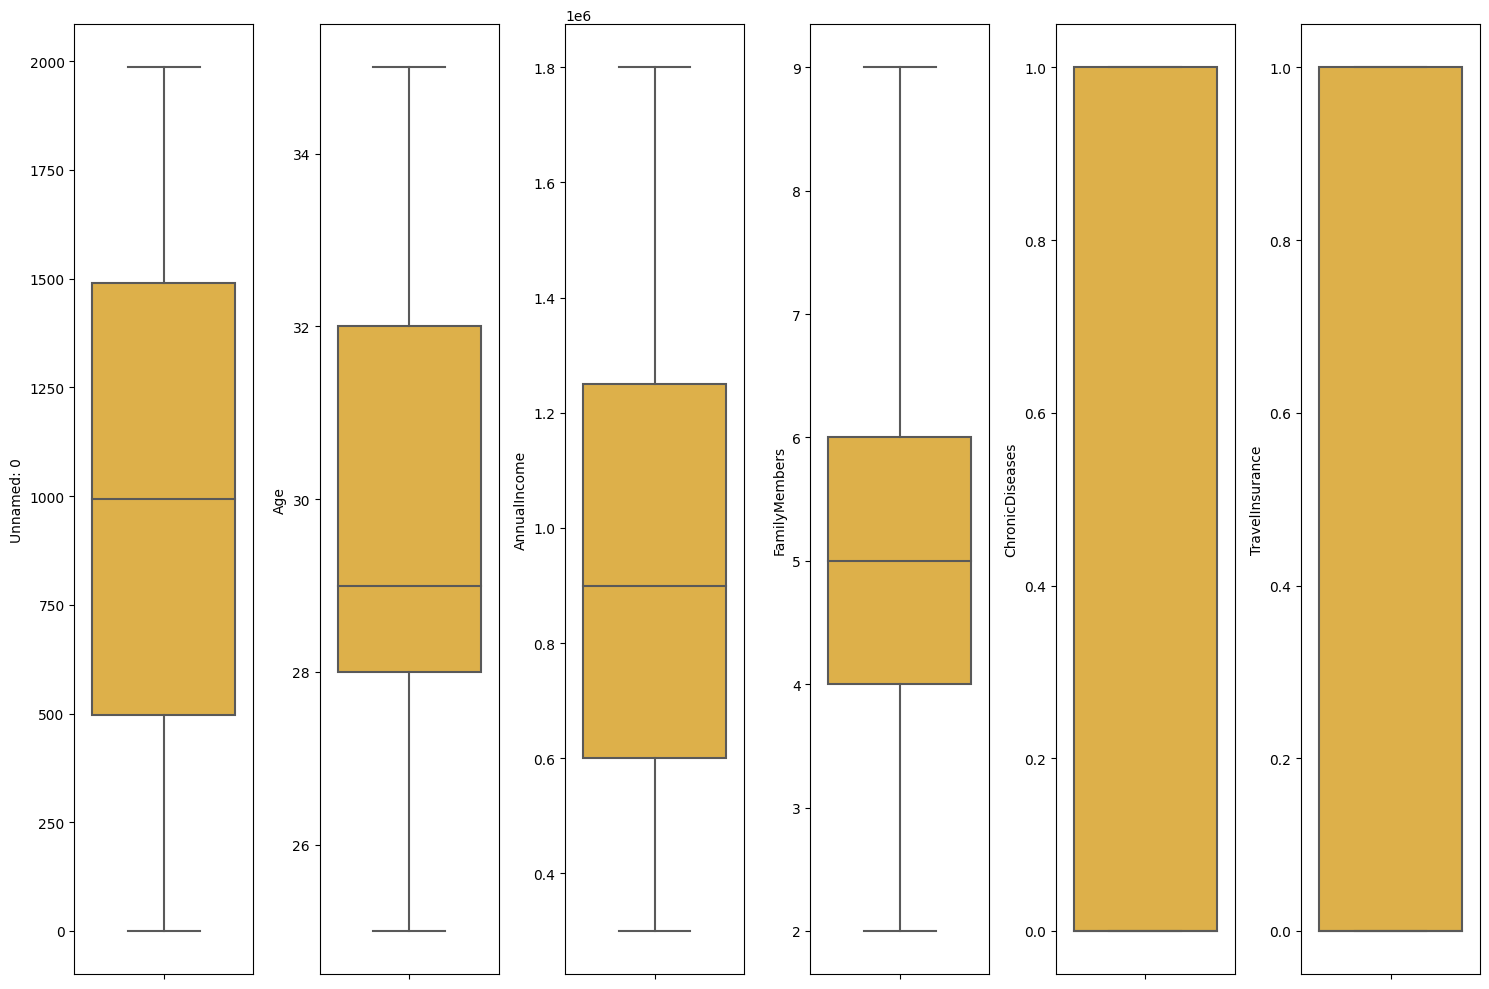

In [ ]:
# display numerical data distribution using box plot
numerical_plotting('box')

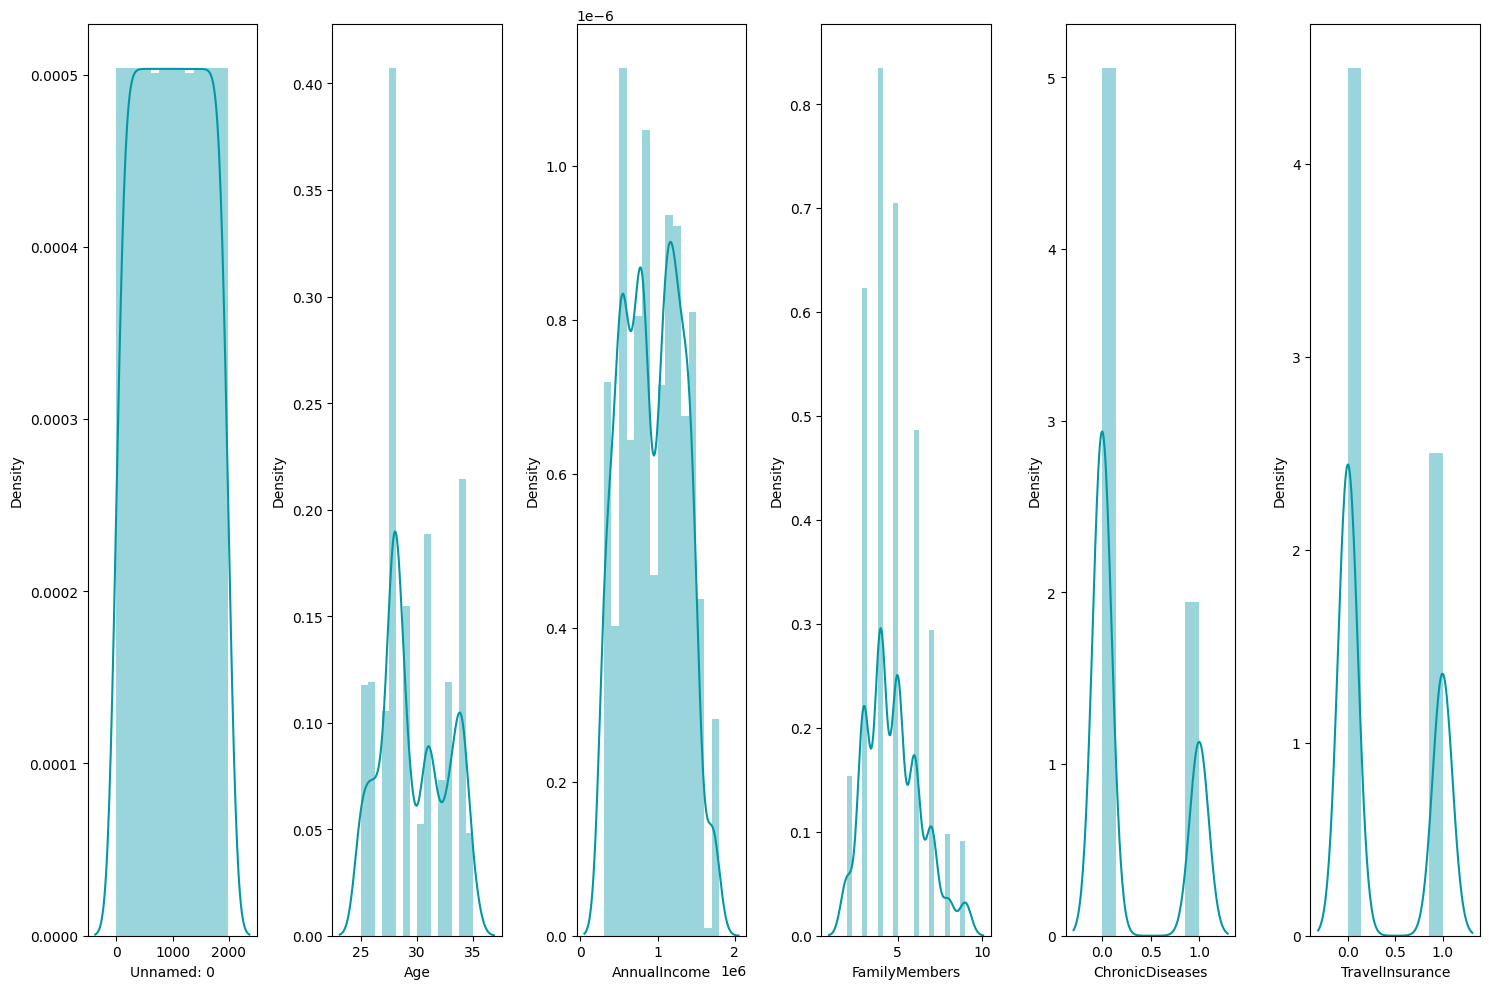

In [ ]:
# display numerical data distribution using distribution plot
numerical_plotting('dist')

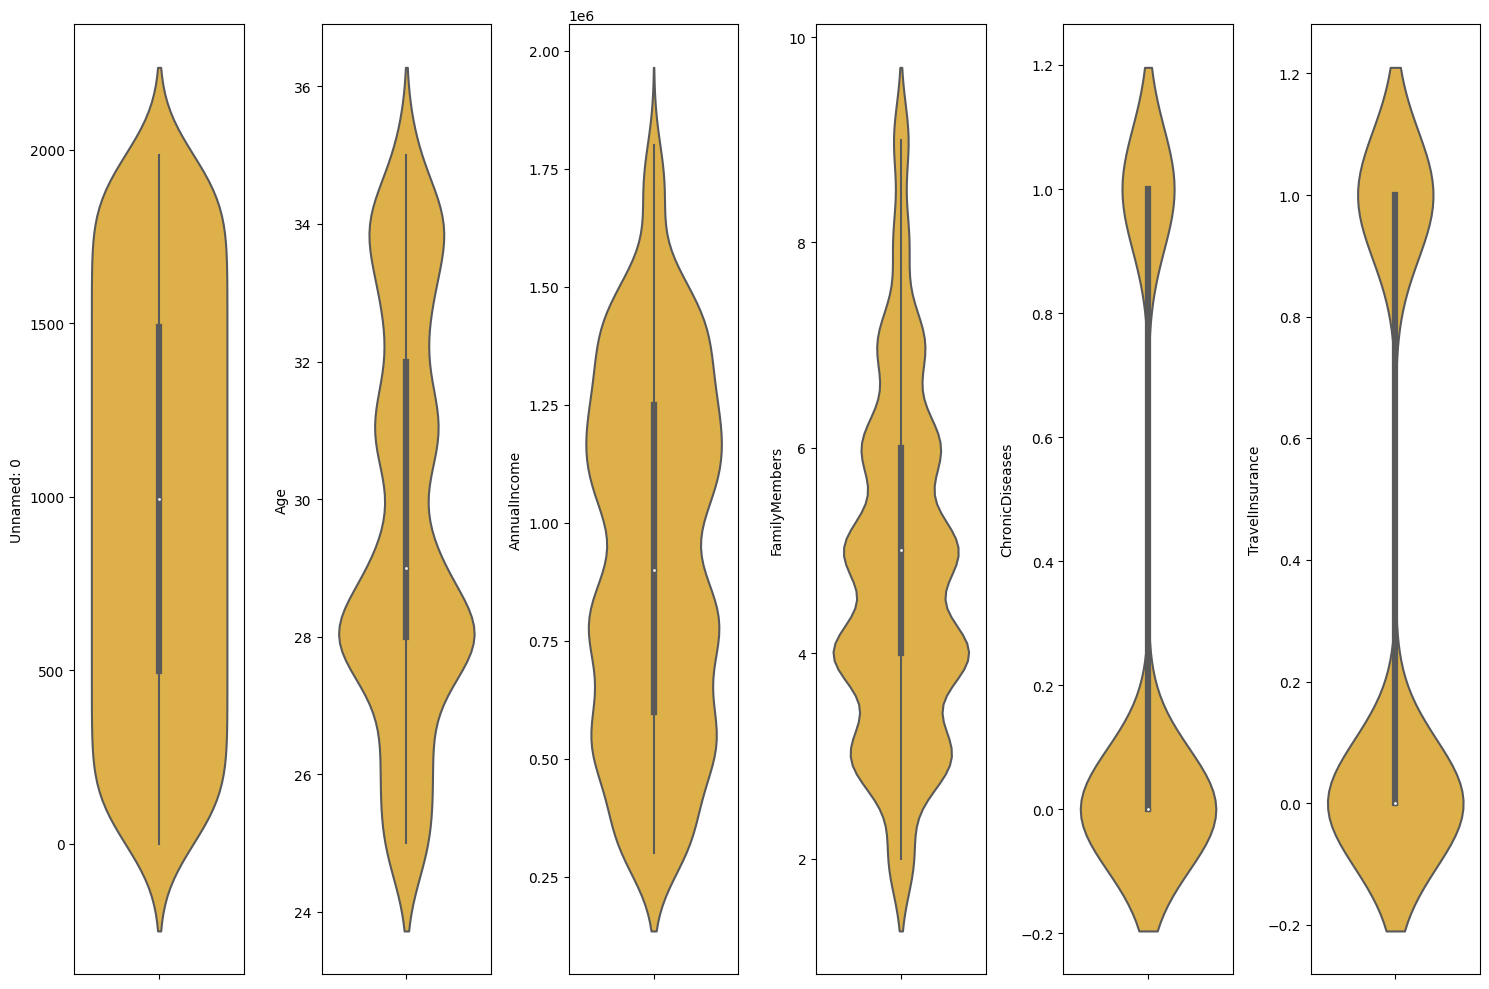

In [ ]:
# display numerical data distribution using violin plot
numerical_plotting('violin')

In [ ]:
# Mencari Outliers Menggunakan IQR

for i in df.columns:
    if df[i].dtypes in [np.int64, np.float64]:
        print(i, ':', df[i].dtypes)

        Q1 = df[i].quantile(0.25)
        print('Q1 =', Q1)

        Q3 = df[i].quantile(0.75)
        print('Q3 =', Q3)

        IQR = Q3 - Q1
        print('IQR =', IQR)

        nilai_min = df[i].min()
        print('nilai min =', nilai_min)
        min_IQR = Q1 - 1.5 * IQR
        print('min_IQR =', min_IQR)

        nilai_max = df[i].max()
        print('nilai max =', nilai_max)
        max_IQR = Q3 + 1.5 * IQR
        print('max_IQR =', max_IQR)

        # Mencari outliers
        if nilai_min < min_IQR:
            print('Low outlier is found <', min_IQR)
            print('Low outlier Index:', list(df[df[i] < min_IQR].index))
        if nilai_max > max_IQR:
            print('High outlier is found >', max_IQR)
            print('High outlier Index:', list(df[df[i] > max_IQR].index))

        print('\n')

Unnamed: 0 : int64
Q1 = 496.5
Q3 = 1489.5
IQR = 993.0
nilai min = 0
min_IQR = -993.0
nilai max = 1986
max_IQR = 2979.0


Age : int64
Q1 = 28.0
Q3 = 32.0
IQR = 4.0
nilai min = 25
min_IQR = 22.0
nilai max = 35
max_IQR = 38.0


AnnualIncome : int64
Q1 = 600000.0
Q3 = 1250000.0
IQR = 650000.0
nilai min = 300000
min_IQR = -375000.0
nilai max = 1800000
max_IQR = 2225000.0


FamilyMembers : int64
Q1 = 4.0
Q3 = 6.0
IQR = 2.0
nilai min = 2
min_IQR = 1.0
nilai max = 9
max_IQR = 9.0


ChronicDiseases : int64
Q1 = 0.0
Q3 = 1.0
IQR = 1.0
nilai min = 0
min_IQR = -1.5
nilai max = 1
max_IQR = 2.5


TravelInsurance : int64
Q1 = 0.0
Q3 = 1.0
IQR = 1.0
nilai min = 0
min_IQR = -1.5
nilai max = 1
max_IQR = 2.5




**Kesimpulan :**


* Tidak terdapat outlier pada data numerical, sehingga tidak perlu dilakukan handling outliers pada stage data preprocessing
* Age distribusi bimodal perlu dilakukan feature transformation pada stage data preprocessing untuk menjamin kualitas dari algoritma
* annualIncome distribusi mendekati normal
* familyMembers skew kanan perlu dilakukan feature transformation pada stage data preprocessing untuk menjamin kualitas dari algoritma
*   ChronicDiseases dan TravelInsurance perlu diubah tipe datanya menjadi categorical, dikarenakan ChronicDiseases dan TravelInsurance hanya berisi 1 dan 0






In [ ]:
'#f5b932ff'
#0198a3ff

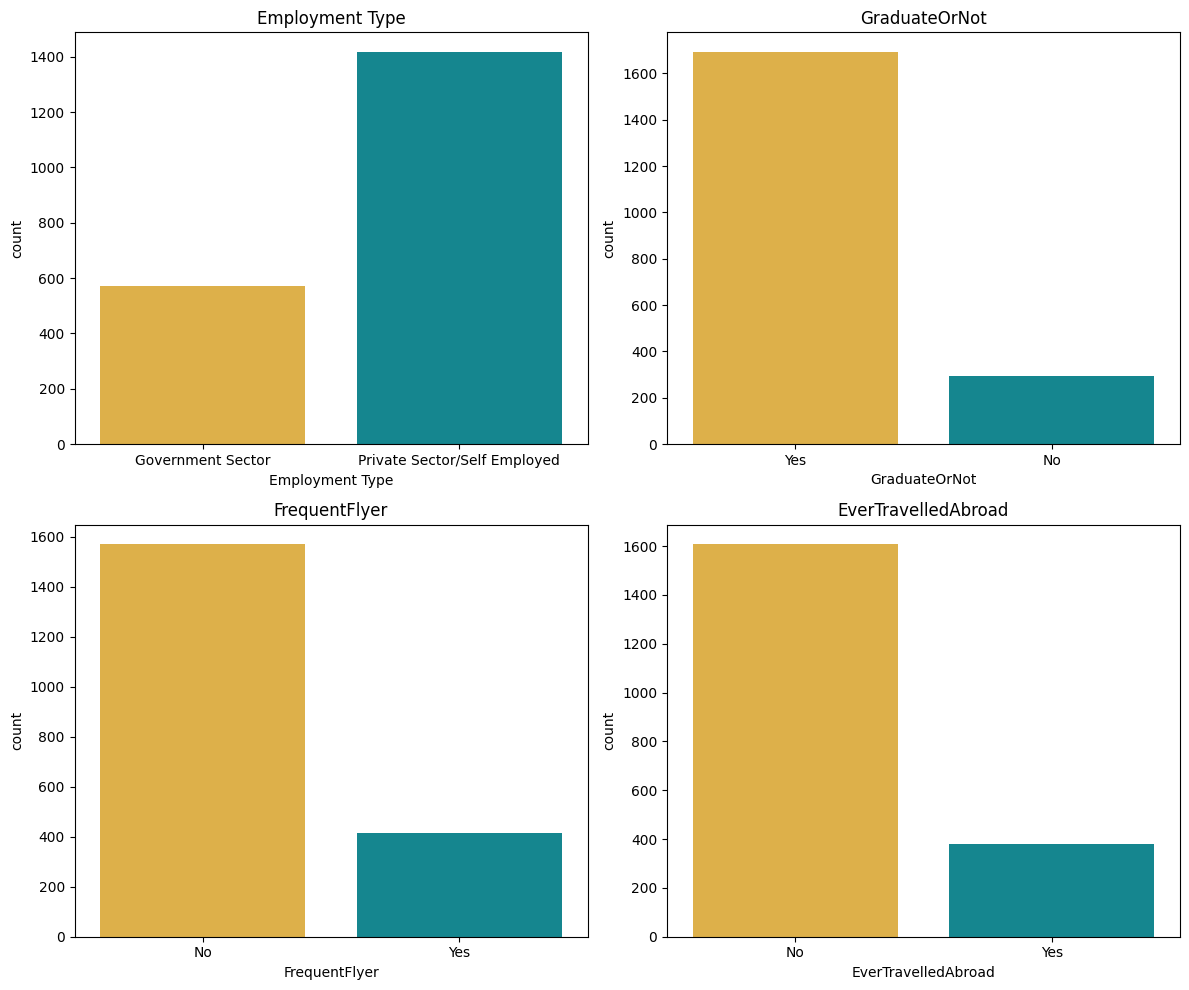

In [ ]:
#Categorical data
# Calculate the number of rows and columns for the subplot grid
num_rows = int(len(categoricals) / 2) + len(categoricals) % 2
num_cols = 2

# Create the subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))
axes = axes.flatten()

colors = ['#f5b932ff', '#0198a3ff']

# count plots
for i, cat_var in enumerate(categoricals):
    sns.countplot(x=cat_var, data=df, ax=axes[i], palette = colors)
    axes[i].set_title(cat_var)

# Hide any remaining empty subplots
for i in range(len(categoricals), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
proportions = {}
for cat_var in categoricals:
    proportions[cat_var] = (df[cat_var].value_counts() / len(df)) * 100

# Display Proportions and Percentages
for cat_var in categoricals:
    print(f"Proportions for {cat_var}:")
    print(proportions[cat_var])
    print("\n")

Proportions for Employment Type:
Private Sector/Self Employed    71.313538
Government Sector               28.686462
Name: Employment Type, dtype: float64


Proportions for GraduateOrNot:
Yes    85.153498
No     14.846502
Name: GraduateOrNot, dtype: float64


Proportions for FrequentFlyer:
No     79.013588
Yes    20.986412
Name: FrequentFlyer, dtype: float64


Proportions for EverTravelledAbroad:
No     80.875692
Yes    19.124308
Name: EverTravelledAbroad, dtype: float64




**Observations:**

All the categorical features are binary. No further actions are required for now.

There is no class imbalance.


## Multivariate Analysis

In [ ]:
#membuat dataframe copy untuk keperluan heatmap saja
df2=df.drop(df.columns[0], axis=1)
df3=df2.copy()

In [ ]:
#melakukan mapping df3 untuk keperluan heatmap only
mapping_EmploymentType = {'Government Sector':1,'Private Sector/Self Employed':0}
mapping_GraduateOrNot = {'Yes':1,'No':0}
mapping_FrequentFlyer = {'Yes':1,'No':0}
mapping_EverTravelledAbroad = {'Yes':1,'No':0}

df3['Employment Type']= df2['Employment Type'].map(mapping_EmploymentType)
df3['GraduateOrNot']= df2['GraduateOrNot'].map(mapping_GraduateOrNot)
df3['FrequentFlyer']= df2['FrequentFlyer'].map(mapping_FrequentFlyer)
df3['EverTravelledAbroad']= df2['EverTravelledAbroad'].map(mapping_EverTravelledAbroad)

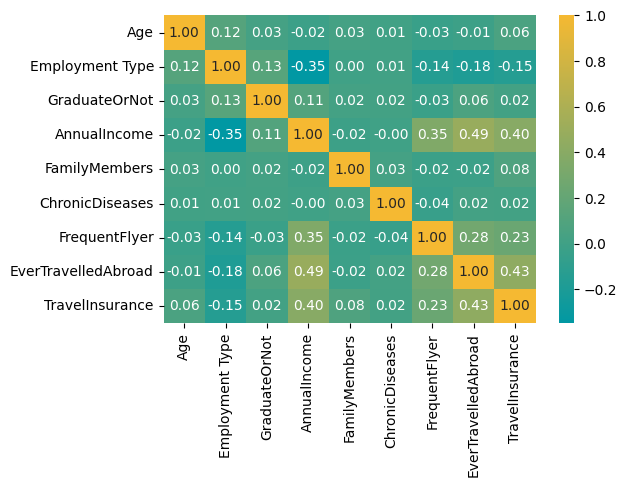

In [ ]:
import matplotlib.colors as mcolors
blue_yellow_cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", ['#0198a3ff', '#f5b932ff'])

plt.figure(figsize=(6,4))
sns.heatmap(df3.corr(), cmap=blue_yellow_cmap, annot=True, fmt='.2f')

plt.show()

In [ ]:
#pengelompokan untuk pairplot/stripplot
plot_cat = ['Age','Employment Type','GraduateOrNot','AnnualIncome','FamilyMembers','FrequentFlyer','EverTravelledAbroad','TravelInsurance']
plot_num = ['Age', 'AnnualIncome', 'FamilyMembers']

In [ ]:
colors = ['#f5b932ff', '#0198a3ff']

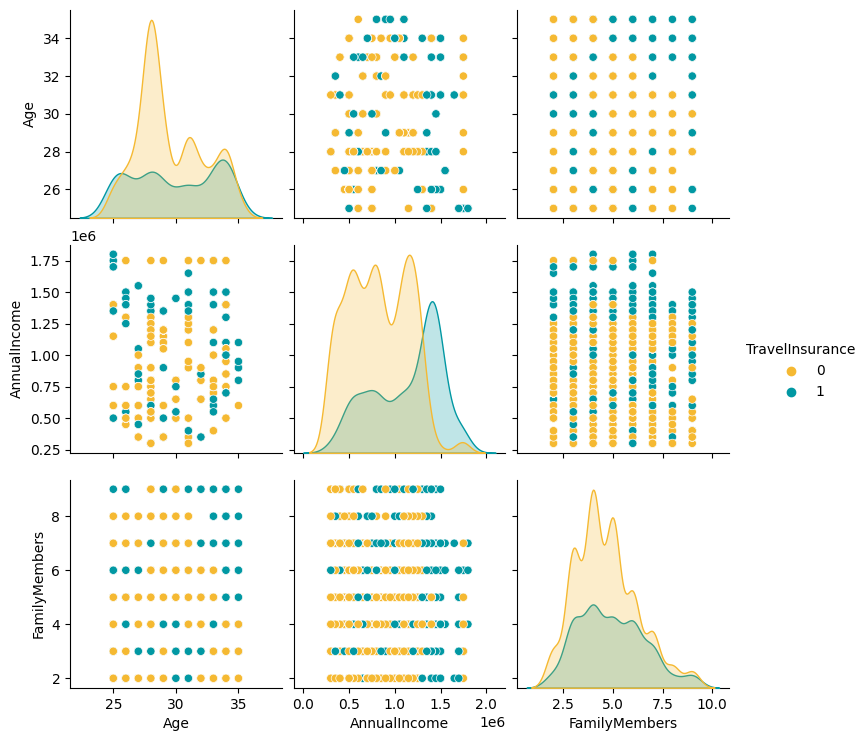

In [ ]:
sns.pairplot(df[plot_cat], diag_kind='kde',hue='TravelInsurance', palette = colors)

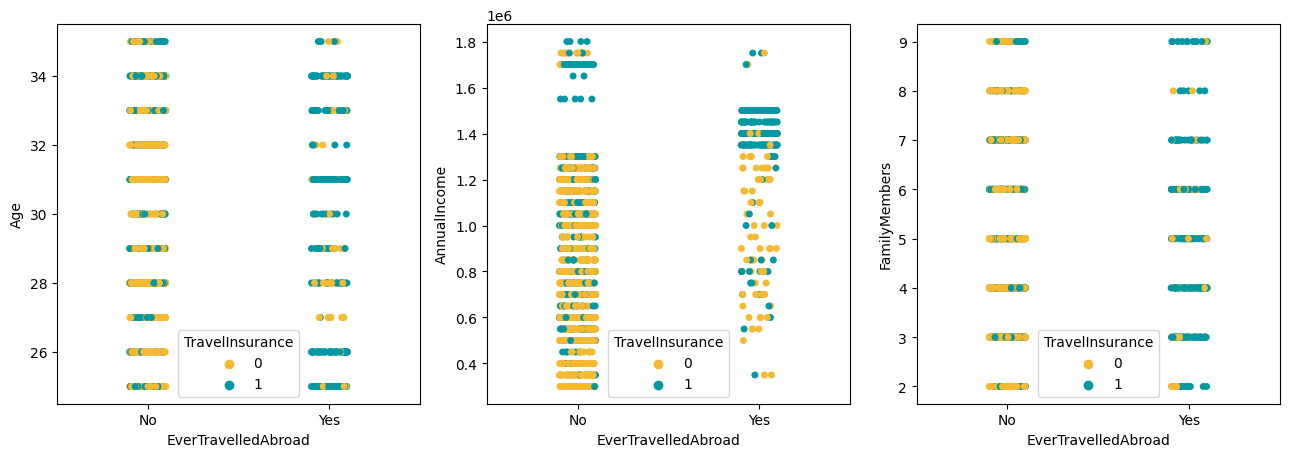

In [ ]:
fig = plt.figure(figsize=(13, 13))
for i in range(0, len(plot_num)):
    ax = fig.add_subplot(3,3, i+1)
    sns.stripplot(ax=ax, data=df[plot_cat], x='EverTravelledAbroad', y=plot_num[i], hue='TravelInsurance', palette = colors)
    plt.tight_layout()

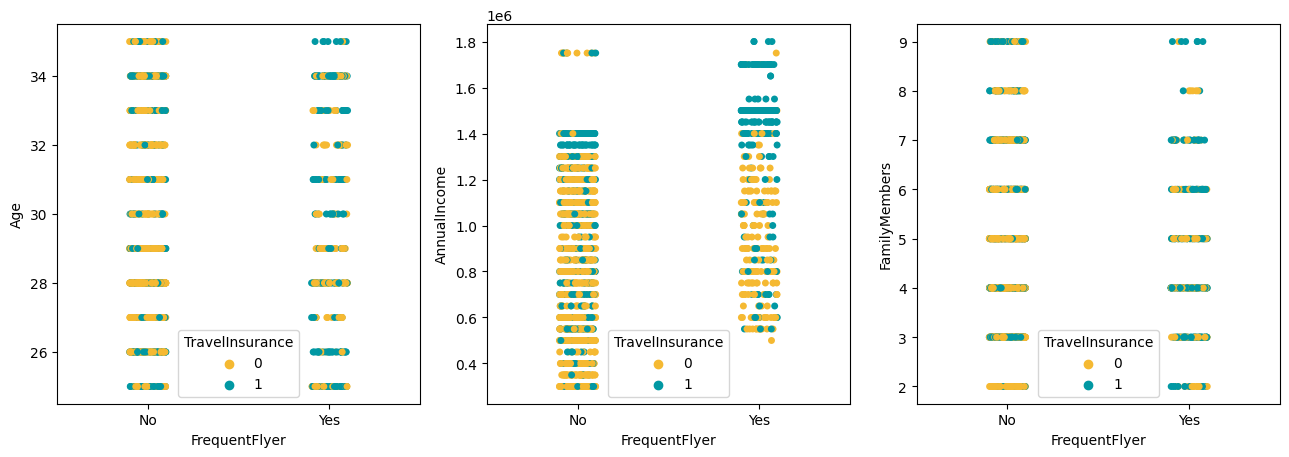

In [ ]:
fig = plt.figure(figsize=(13, 13))
for i in range(0, len(plot_num)):
    ax = fig.add_subplot(3,3, i+1)
    sns.stripplot(ax=ax, data=df[plot_cat], x='FrequentFlyer', y=plot_num[i], hue='TravelInsurance', palette = colors)
    plt.tight_layout()

Dari Striplot di atas terlihat cukup konsisten antara feature EverTraveledAbroad,FrequentFlyer, AnnualIncome dengan label (TravelInsurance)

## Kesimpulan</br>
* Terdapat pasang-pasangan feature yang berkorelasi satu sama lain yaitu :</br>
  * FreqentFlyer dan Annual Income (0.35) </br>
  * EverTravelledAbroad dan Annual Income(0.49)</br>
  * EmploymentType dan Annual Income (-0.35)</br>
  (EmplomentType : Private Sector/Self Employed berkorelasi positif dengan Annual Income, Government Sector berkorelasi negatif dengan Annual Income)
  * EverTravelledAbroad dan FrequentFlyer(0.28)</br>
* Sedangkan feature-feature yang memiliki korelasi tinggi dengan label :</br>
  * TravelInsurance dan Annual Income(0.40)</br>
  * TravelInsurance dan FrequentFlyer(0.23)</br>
  * TravelInsurance dan EverTravelledAbroad(0.43)</br>



## Rekomendasi : </br>
* untuk heatmap, tidak ada fitur yang redundant >0.7, jadi tidak perlu ada fitur yang dihilangkan </br>
* untuk antar feature yang memiliki korelasi tinggi, bisa di explore lebih lanjut</br>

##Insight & Business Recommendation


### Low Level Analysis (2 Parameter Analysis)

In [ ]:
travel = df.groupby(df['TravelInsurance'])['Unnamed: 0'].count().reset_index()
from decimal import ROUND_UP
travel['Percentage_TI']=round(travel['Unnamed: 0']/(sum(travel['Unnamed: 0']))*100,0)
travel


,TravelInsurance,Unnamed: 0,Percentage_TI
0,0,1277,64.0
1,1,710,36.0


([<matplotlib.patches.Wedge at 0x1a4e99680d0>,
 [Text(-0.46835717599151955, 0.995309778760989, '0'),
  Text(0.468357175991519, -0.9953097787609894, '1')],
 [Text(-0.2554675505408288, 0.5428962429605394, '64%'),
  Text(0.2554675505408285, -0.5428962429605396, '36%')])

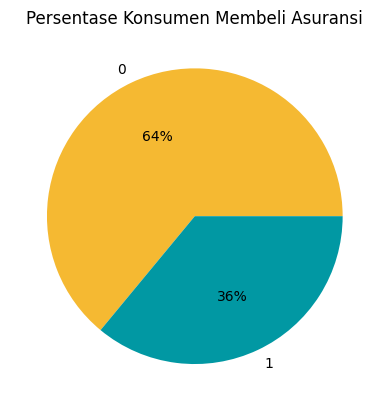

In [ ]:
plt.title('Persentase Konsumen Membeli Asuransi')
plt.pie(travel['Percentage_TI'],labels=travel['TravelInsurance'],autopct='%.0f%%', colors = colors)

Insight : Persentase pelanggan yang tidak tertarik membeli travel insurance lebih besar yaitu sebesar 64%.

In [ ]:
age1 = df.groupby(['Age','TravelInsurance']).size().unstack().reset_index()
age1['total'] = age1.drop('Age', axis=1).sum(axis=1)

age1_percentage = age1.copy()
for col in age1_percentage.columns[1:3]:
    age1_percentage[col] = age1_percentage[col] / age1_percentage['total'] * 100

age1_percentage = age1_percentage.drop('total', axis=1)
age1_percentage = age1_percentage.reset_index(drop=True)
age1_percentage = age1_percentage.drop('Age', axis=1)

age1_percentage

TravelInsurance,0,1
0,36.986301,63.013699
1,50.000000,50.000000
2,79.389313,20.610687
3,79.249012,20.750988
4,73.437500,26.562500
5,56.923077,43.076923
6,67.948718,32.051282
7,79.120879,20.879121
8,47.297297,52.702703
9,50.000000,50.000000


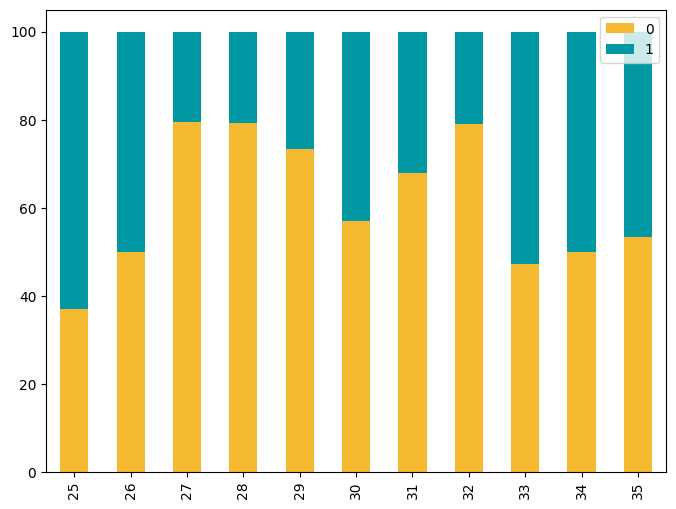

In [ ]:
age = list(range(25, 36))
fig, axes = plt.subplots(figsize = (8, 6))

axes1 = age1_percentage.plot(kind='bar', stacked=True, ax = axes, color = colors )
axes1.set_xticklabels(age)  # Set the new x-axis labels

plt.legend()

for label in axes1.get_xticklabels():
    label.set_rotation(90)

plt.show()

> Insight : Pelanggan dengan umur 27-32tahun terlihat banyak yang tidak tertarik untuk membeli travel insurance. Sedangkan pelanggan umur <= 26 dan >=33 terlihat banyak yg tertarik membeli.



In [ ]:
et1 = df.groupby(['Employment Type','TravelInsurance']).size().unstack().reset_index()
et1['total'] = et1.sum(axis=1)

et1_percentage = et1.copy()
for col in et1_percentage.columns[1:-1]:
    et1_percentage[col] = et1_percentage[col] / et1_percentage['total'] * 100

et1_percentage = et1_percentage.drop('total', axis=1)
et1_percentage = et1_percentage.reset_index(drop=True)

et1_percentage

TravelInsurance,Employment Type,0,1
0,Government Sector,75.438596,24.561404
1,Private Sector/Self Employed,59.774171,40.225829


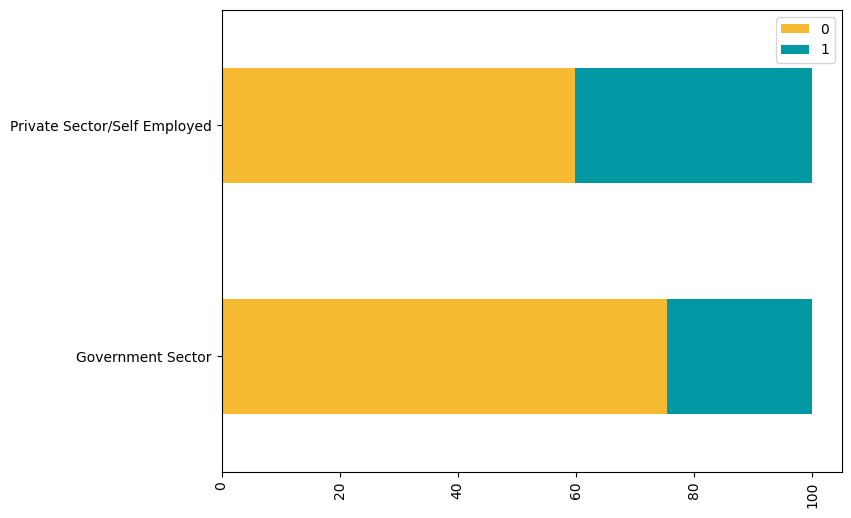

In [ ]:
employment = ['Government Sector', 'Private Sector/Self Employed']
fig, axes = plt.subplots(figsize = (8, 6))

axes1 = et1_percentage.plot(kind='barh', stacked=True, ax = axes, color = colors )
axes1.set_yticklabels(employment)  # Set the new x-axis labels

plt.legend()

for label in axes1.get_xticklabels():
    label.set_rotation(90)

plt.show()

> Insight : Pelanggan dengan tipe pekerjaan private sector/self employed lebih tertarik membeli travel insurance sebesar 80% dibanding government sector yang hanya tertarik 20% saja.

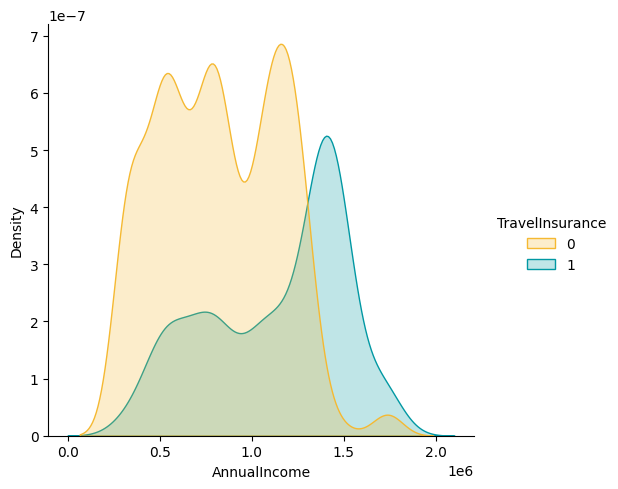

In [ ]:
sns.displot(df, x = 'AnnualIncome',hue = 'TravelInsurance',kind='kde',fill=True, palette = colors)

> Insight : Terjadi kenaikan tajam pada pelanggan dengan pendapatan tahunan
diatas 1.3M untuk tertarik untuk membeli asuransi perjalanan.


In [ ]:
gr1 = df.groupby(['GraduateOrNot','TravelInsurance']).size().unstack().reset_index()
gr1['total'] = gr1.sum(axis=1)

gr1_percentage = gr1.copy()
for col in gr1_percentage.columns[1:-1]:
    gr1_percentage[col] = gr1_percentage[col] / gr1_percentage['total'] * 100

gr1_percentage = gr1_percentage.drop('total', axis=1)
gr1_percentage = gr1_percentage.reset_index(drop=True)

gr1_percentage

TravelInsurance,GraduateOrNot,0,1
0,No,66.440678,33.559322
1,Yes,63.888889,36.111111


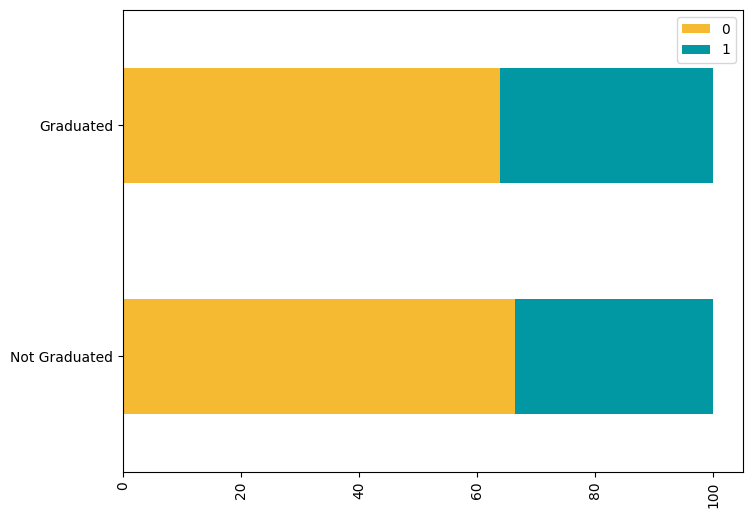

In [ ]:
graduate = ['Not Graduated', 'Graduated']
fig, axes = plt.subplots(figsize = (8, 6))

axes1 = gr1_percentage.plot(kind='barh', stacked=True, ax = axes, color = colors )
axes1.set_yticklabels(graduate)  # Set the new x-axis labels

plt.legend()

for label in axes1.get_xticklabels():
    label.set_rotation(90)

plt.show()

> Insigt : Pelanggan dengan lulusan perguruan tinggi ataupun bukan, tidak memiliki dampat pada ketertarikan pembelian travel insurance.



In [ ]:
fm1 = df.groupby(['FamilyMembers','TravelInsurance']).size().unstack().reset_index()
fm1['total'] = fm1.drop('FamilyMembers', axis=1).sum(axis=1)

fm1_percentage = fm1.copy()
for col in fm1_percentage.columns[1:3]:
    fm1_percentage[col] = fm1_percentage[col] / fm1_percentage['total'] * 100

fm1_percentage = fm1_percentage.drop('total', axis=1)
fm1_percentage = fm1_percentage.reset_index(drop=True)
fm1_percentage = fm1_percentage.drop('FamilyMembers', axis=1)

fm1_percentage['']

TravelInsurance,0,1
0,70.967742,29.032258
1,64.190981,35.809019
2,68.316832,31.683168
3,69.248826,30.751174
4,56.122449,43.877551
5,54.494382,45.505618
6,64.406780,35.593220
7,52.727273,47.272727


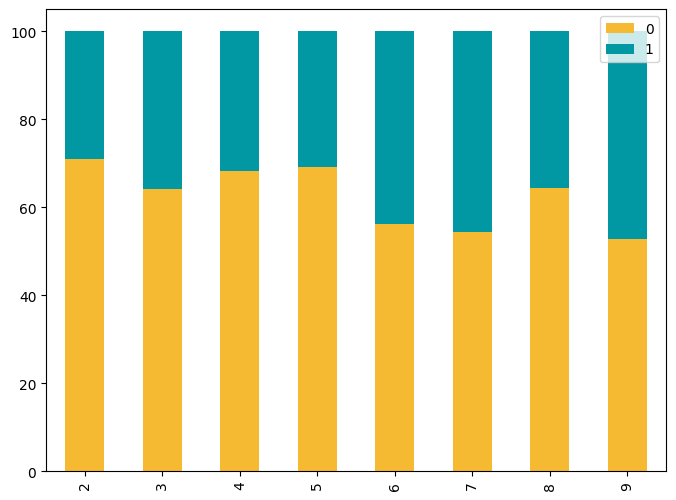

In [ ]:
familymember = list(range(2, 10))
fig, axes = plt.subplots(figsize = (8, 6))

axes1 = fm1_percentage.plot(kind='bar', stacked=True, ax = axes, color = colors )
axes1.set_xticklabels(list(familymember))  # Set the new x-axis labels

plt.legend()

for label in axes1.get_xticklabels():
    label.set_rotation(90)

plt.show()

> Insight : Keluarga dengan jumlah anggota 6 orang keatas lebih terlihat tertarik untuk membeli travel insurance, sedangkan yang berjumlah 2 orang terlihat hanya sedikit yang tertarik dan keluarga dengan anggota 3-5 orang agak banyak tertarik.



In [ ]:
cd1 = df.groupby(['ChronicDiseases','TravelInsurance']).size().unstack().reset_index()
cd1['total'] = cd1.sum(axis=1)

cd1_percentage = cd1.copy()
for col in cd1_percentage.columns[1:-1]:
    cd1_percentage[col] = cd1_percentage[col] / cd1_percentage['total'] * 100

cd1_percentage = cd1_percentage.drop('total', axis=1)
cd1_percentage = cd1_percentage.reset_index(drop=True)

cd1_percentage

TravelInsurance,ChronicDiseases,0,1
0,0,64.808362,35.191638
1,1,62.748644,37.070524


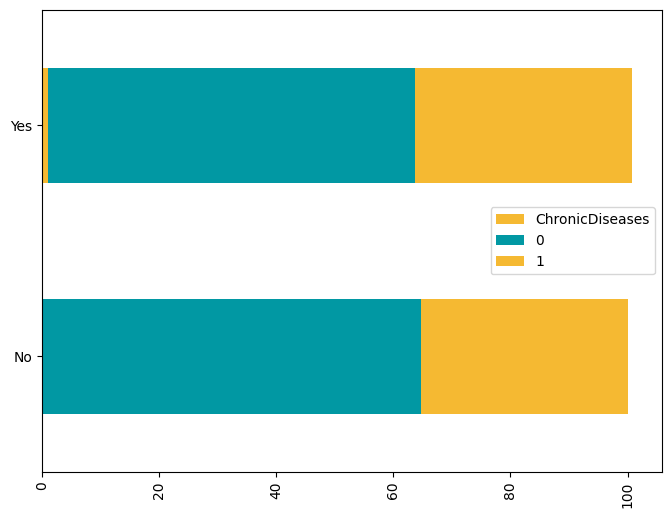

In [ ]:
chronic = ['No', 'Yes']
fig, axes = plt.subplots(figsize = (8, 6))

axes1 = cd1_percentage.plot(kind='barh', stacked=True, ax = axes, color = colors )
axes1.set_yticklabels(chronic)  # Set the new x-axis labels

plt.legend()

for label in axes1.get_xticklabels():
    label.set_rotation(90)

plt.show()

> Insight : Pelanggan dengan penyakit bawaan maupun tidak, tidak memiliki dampak yang signifikan pada pembelian travel insurance.

In [ ]:
eta1 = df.groupby(['EverTravelledAbroad','TravelInsurance']).size().unstack().reset_index()
eta1['total'] = eta1.sum(axis=1)

eta1_percentage = eta1.copy()
for col in eta1_percentage.columns[1:-1]:
    eta1_percentage[col] = eta1_percentage[col] / eta1_percentage['total'] * 100

eta1_percentage = eta1_percentage.drop('total', axis=1)
eta1_percentage = eta1_percentage.reset_index(drop=True)

eta1_percentage

TravelInsurance,EverTravelledAbroad,0,1
0,No,74.362166,25.637834
1,Yes,21.578947,78.421053


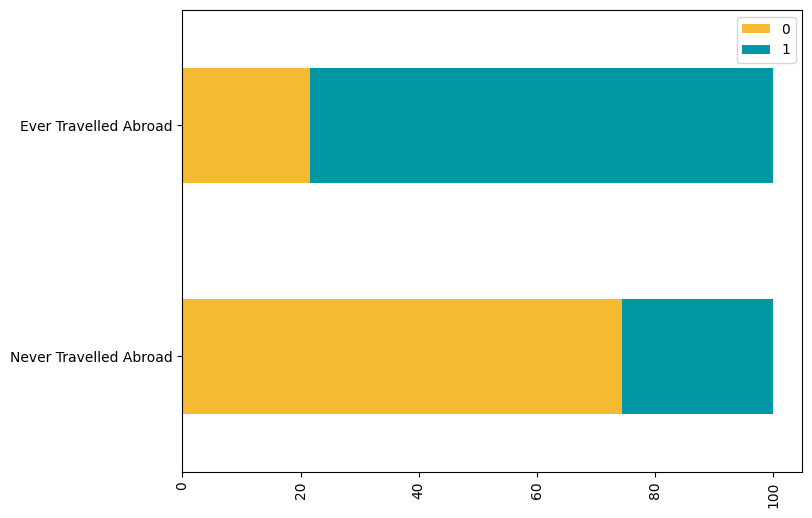

In [ ]:
travel = ['Never Travelled Abroad', 'Ever Travelled Abroad']
fig, axes = plt.subplots(figsize = (8, 6))

axes1 = eta1_percentage.plot(kind='barh', stacked=True, ax = axes, color = colors )
axes1.set_yticklabels(travel)  # Set the new x-axis labels

plt.legend()

for label in axes1.get_xticklabels():
    label.set_rotation(90)

plt.show()

> Insight : Secara signifikan pelanggan yang melakukan perjalanan abroad lebih banyak tertarik untuk membeli travel insurance yaitu sebesar 42% dibanding yang tidak membeli. Sedangkan pelanggan yang tidak melakukan perjalanan abroad merasa tidak tertarik untuk membeli travel insurance.

In [ ]:
ff1 = df.groupby(['FrequentFlyer','TravelInsurance']).size().unstack().reset_index()
ff1['total'] = ff1.sum(axis=1)

ff1_percentage = ff1.copy()
for col in ff1_percentage.columns[1:-1]:
    ff1_percentage[col] = ff1_percentage[col] / ff1_percentage['total'] * 100

ff1_percentage = ff1_percentage.drop('total', axis=1)
ff1_percentage = ff1_percentage.reset_index(drop=True)

ff1_percentage

TravelInsurance,FrequentFlyer,0,1
0,No,70.000000,30.000000
1,Yes,42.685851,57.314149


In [ ]:
colors

['#f5b932ff', '#0198a3ff']

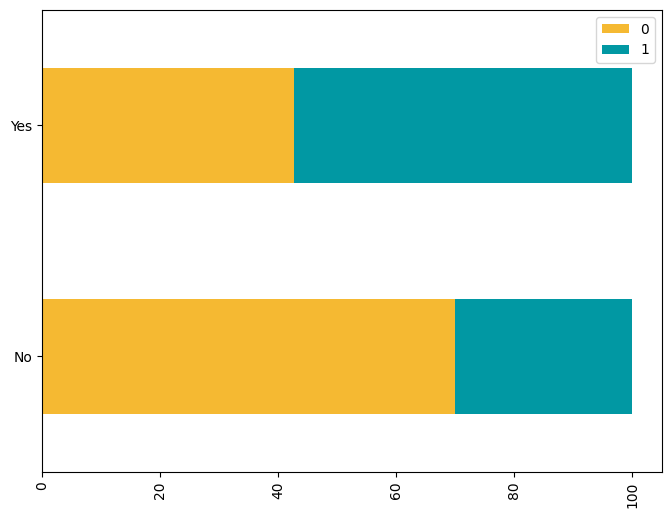

In [ ]:
freqflyer = ['No', 'Yes']
fig, axes = plt.subplots(figsize = (8, 6))

axes1 = ff1_percentage.plot(kind='barh', stacked=True, ax = axes, color = colors )
axes1.set_yticklabels(freqflyer)  # Set the new x-axis labels

plt.legend()

for label in axes1.get_xticklabels():
    label.set_rotation(90)

plt.show()

> Insight : Pelanggan yang sering melakukan penerbangan lebih banyak tertarik untuk membeli travel insurance.

### High Level Analysis (Analisis 3 Parameter atau Lebih)

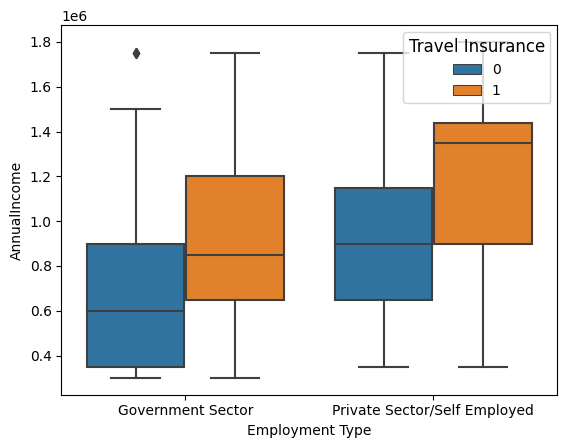

In [ ]:
# create grouped boxplot
sns.boxplot(x = df['Employment Type'],
            y = df['AnnualIncome'],
            hue = df['TravelInsurance'])

# Tampilkan plot dan atur legenda di sudut kanan atas
plt.legend(title='Travel Insurance', title_fontsize=12, fontsize=10, loc='upper right')
plt.show()

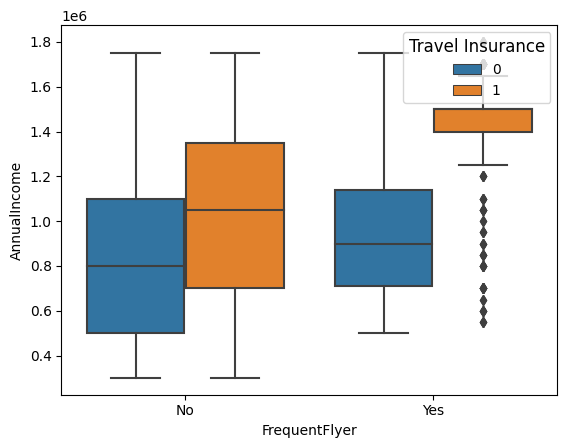

In [ ]:
# create grouped boxplot
sns.boxplot(x = df['FrequentFlyer'],
            y = df['AnnualIncome'],
            hue = df['TravelInsurance'])

# Tampilkan plot dan atur legenda di sudut kanan atas
plt.legend(title='Travel Insurance', title_fontsize=12, fontsize=10, loc='upper right')
plt.show()

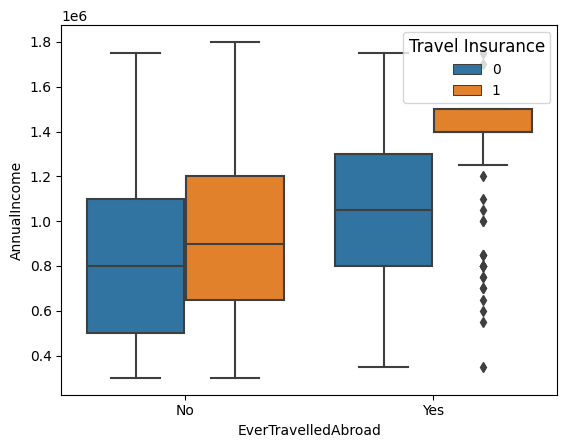

In [ ]:
# create grouped boxplot
sns.boxplot(x = df['EverTravelledAbroad'],
            y = df['AnnualIncome'],
            hue = df['TravelInsurance'])

# Tampilkan plot dan atur legenda di sudut kanan atas
plt.legend(title='Travel Insurance', title_fontsize=12, fontsize=10, loc='upper right')
plt.show()

### Business Recommendation
- Menargetkan promo penawaran terhadap target pelanggan dengan kriteria
    - bekerja di private sector/self employment.
    - memiliki annual income diatas 1.3M.
    - merupakan lulusan perguruan tinggi.
    - pernah melakukan perjalanan keluar negeri.
    - Sering melakukan penerbangan.
- Melakukan pembagian umur menjadi 3 kategori dan promo penawaran dengan target pelanggan yang berumur kurang dari 26 tahun dan diatas 33 tahun.
- Membagi jumlah anggota keluarga menjadi 3 kategori.
- Membuat prioritas terhadap pelanggan dengna kriteria :
    - Memprioritaskan penawaran kepada pelanggan yang bekerja di private sector dan memiliki annual income 1,0 - 11,4 M .
    - Memiliki annual income 0,8 - 1,4 M yang belum sering melakukan penerbangan.
    - .


